<a href="https://colab.research.google.com/github/vivek-c29/Vivek_Compute_Tasks/blob/main/ML_model_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data2.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


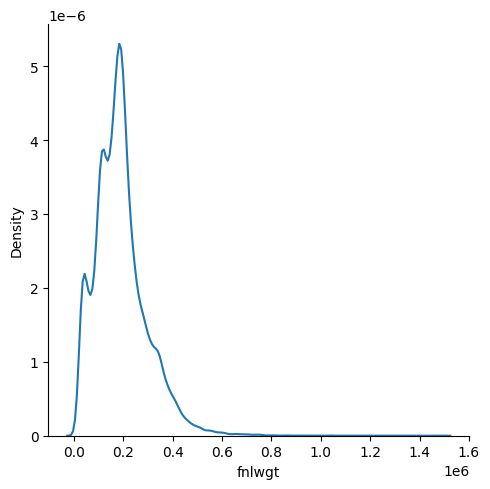

In [ ]:
sns.displot(df['fnlwgt'],kind='kde')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='fnlwgt'>

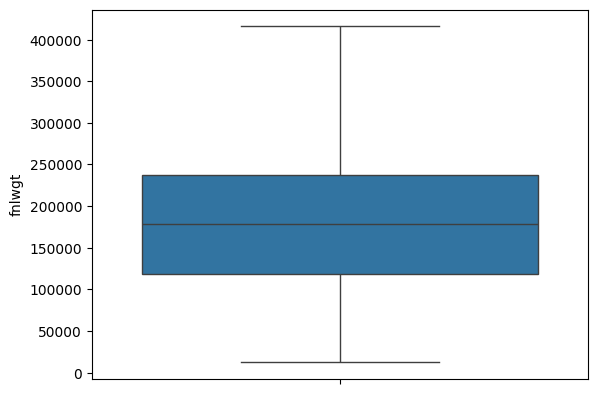

In [ ]:
def outlier_handle(df,columns):
    for col in columns:
        percent25=df[col].quantile(0.25)
        percent75=df[col].quantile(0.75)
        iqr=percent75-percent25
        upper_limit=percent75+1.5*iqr
        lower_limit=percent25-1.5*iqr
        df[col]=np.where(
        df[col]>upper_limit,
        upper_limit,
        np.where(
            df[col]<lower_limit,
            lower_limit,
            df[col]
            )
        )

outlier_handle(df,['fnlwgt'])
sns.boxplot(df['fnlwgt'])

In [ ]:
df['workclass']=df['workclass'].replace(to_replace='?',value='Private')

In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,24532
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='age'>

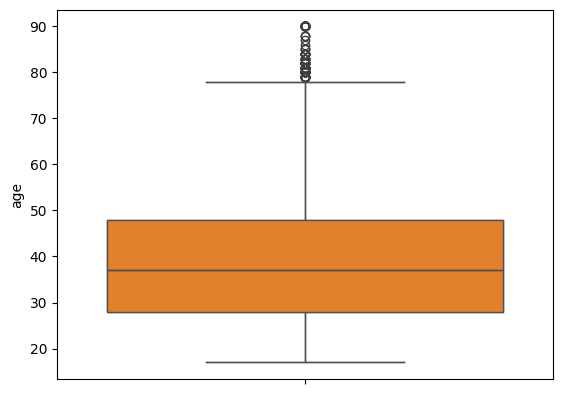

In [ ]:
sns.boxplot(df['age'])
outlier_handle(df,['age'])
sns.boxplot(df['age'])

In [ ]:
df['education.num'].value_counts()

,count
education.num,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


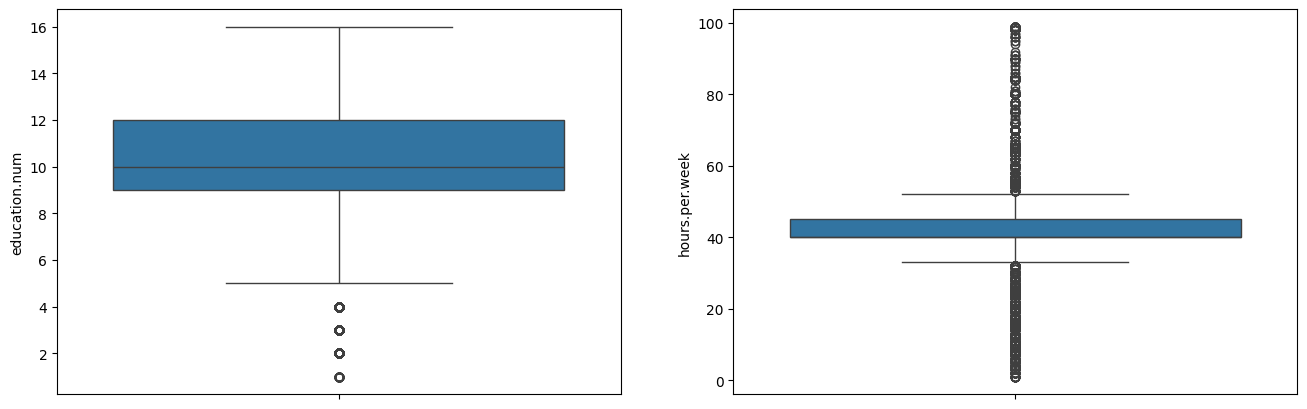

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['education.num'])

plt.subplot(1,2,2)

sns.boxplot(df['hours.per.week'])
plt.show()

In [ ]:
df['education.num'].skew()

-0.31167586791022966

In [ ]:
df['education.num'].describe()

,education.num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


In [ ]:
outlier_handle(df,['education.num','hours.per.week'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


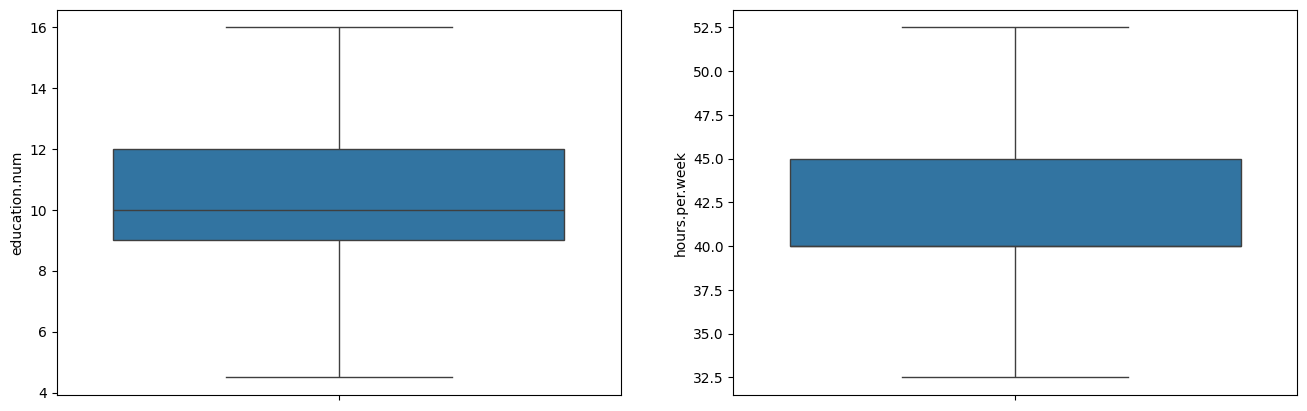

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['education.num'])

plt.subplot(1,2,2)

sns.boxplot(df['hours.per.week'])
plt.show()

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


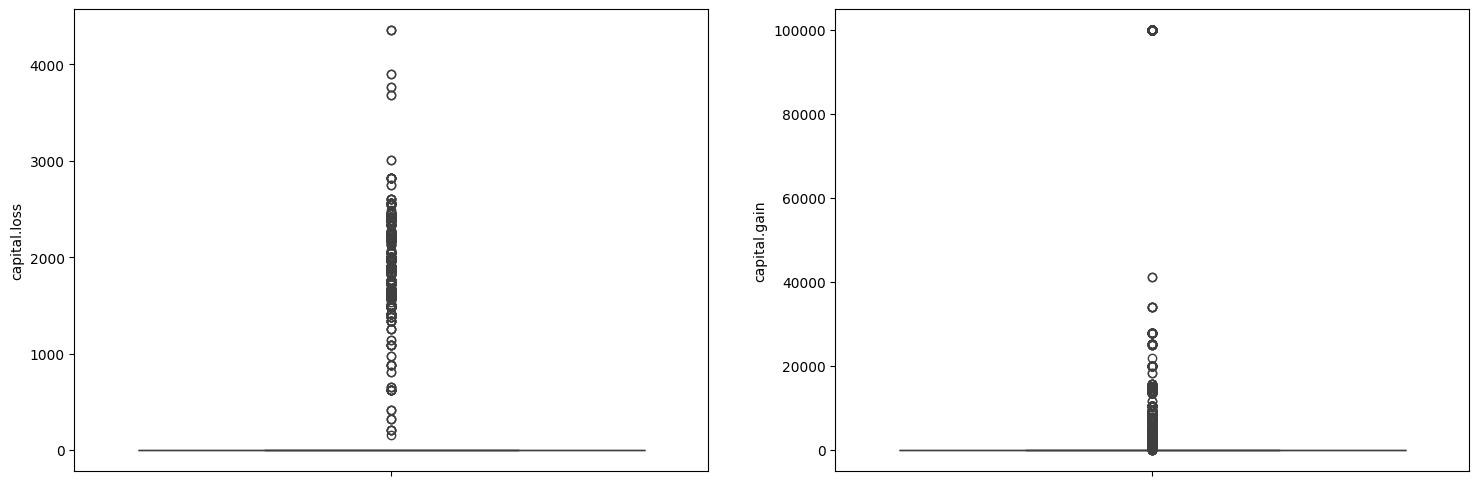

In [ ]:
df['capital.gain'].value_counts()
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(df['capital.loss'])

plt.subplot(1,2,2)
sns.boxplot(df['capital.gain'])
plt.show()

In [ ]:
# sns.countplot(df['capital.gain'])

In [ ]:
df['capital.gain'].skew()

11.953847687699794

In [ ]:
# df['capital.gain']=np.log1p(df['capital.gain'])
# df['capital.loss']=np.log1p(df['capital.loss'])

In [ ]:
print(df['capital.gain'].skew())
print(df['capital.loss'].skew())

11.953847687699794
4.594629121679696


In [ ]:
# df=df.drop(['marital.status','relationship','race','sex'],axis=1)

In [ ]:
# outlier_handle(df,['capital.gain'])
# sns.boxplot(df['capital.gain'])

In [ ]:
df['capital.gain'].value_counts()

,count
capital.gain,
0,29849
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
4931,1
7978,1


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


In [ ]:
df['occupation'].value_counts()


,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [ ]:
print(df['occupation'].mode())

0    Prof-specialty
Name: occupation, dtype: object


In [ ]:
df['occupation']=df['occupation'].replace(to_replace='?',value='Prof-specialty')

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0,3770,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,32.5,United-States,>50K
8,68.0,Federal-gov,415887.0,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40.0,United-States,<=50K
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0,3004,52.5,?,>50K


In [ ]:
# df['income']=df['income'].replace(to_replace='<=50K',value=0)
# df['income']=df['income'].replace(to_replace='>50K',value=1)
df['marital.status'].value_counts()

,count
marital.status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
df['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [ ]:
df['native.country']=df['native.country'].replace(to_replace='?',value='United-States ')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='income', ylabel='count'>

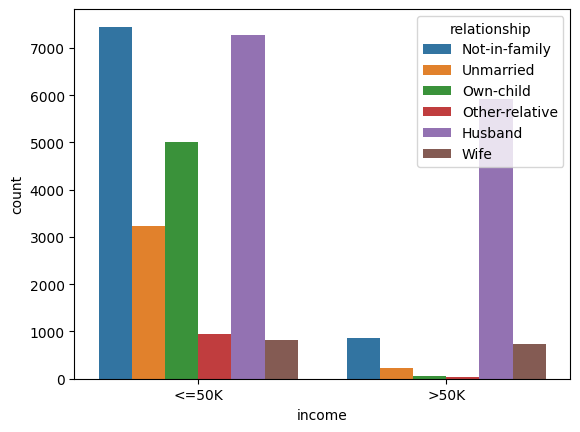

In [ ]:
sns.countplot(x='income',hue='relationship',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='income', ylabel='count'>

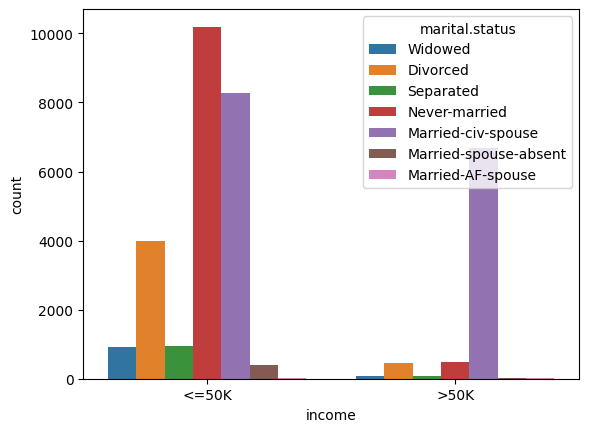

In [ ]:
sns.countplot(x='income',hue='marital.status',data=df)


<Axes: xlabel='income', ylabel='hours.per.week'>

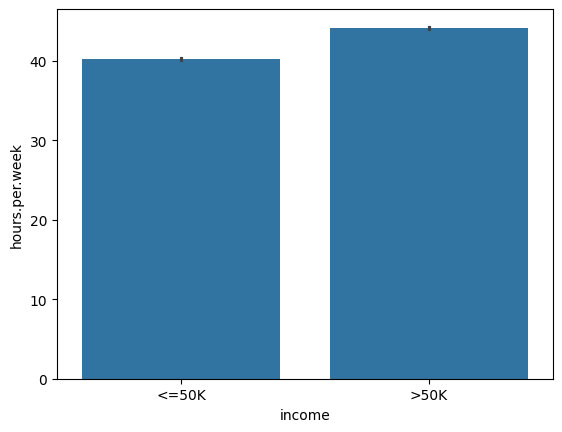

In [ ]:
sns.barplot(x='income',y='hours.per.week',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='income', ylabel='count'>

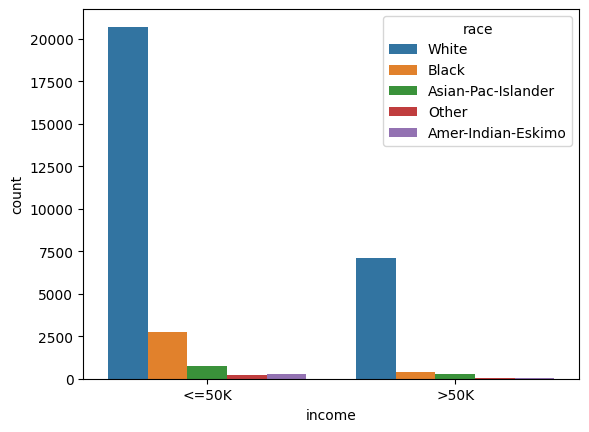

In [ ]:
sns.countplot(x='income',hue='race',data=df)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


In [ ]:
df['native.country'].value_counts()

,count
native.country,
United-States,29170
Mexico,643
United-States,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
# df=pd.get_dummies(df,columns=['workclass','education','occupation','income','native.country'],drop_first=True,dtype=int)

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0,3770,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,32.5,United-States,>50K
8,68.0,Federal-gov,415887.0,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40.0,United-States,<=50K
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0,3004,52.5,United-States,>50K


In [ ]:
df.dtypes

,0
age,float64
workclass,object
fnlwgt,float64
education,object
education.num,float64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df.drop(columns=['race','sex'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for col in df.columns:
    if df[col].dtype==object:
        df[col]=lbl.fit_transform(df[col])

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,3,77053.0,11,9.0,6,9,1,0,4356,40.0,38,0
1,78.0,3,132870.0,11,9.0,6,3,1,0,4356,32.5,38,0
2,66.0,3,186061.0,15,10.0,6,9,4,0,4356,40.0,38,0
3,54.0,3,140359.0,5,4.5,0,6,4,0,3900,40.0,38,0
4,41.0,3,264663.0,15,10.0,5,9,3,0,3900,40.0,38,0
5,34.0,3,216864.0,11,9.0,0,7,4,0,3770,45.0,38,0
6,38.0,3,150601.0,0,6.0,5,0,4,0,3770,40.0,38,0
7,74.0,6,88638.0,10,16.0,4,9,2,0,3683,32.5,38,1
8,68.0,0,415887.0,11,9.0,0,9,1,0,3683,40.0,38,0
9,41.0,3,70037.0,15,10.0,4,2,4,0,3004,52.5,39,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Change X_scaled
# Replace X_scaled with X

In [ ]:
y=df['income']
X=df.drop(['income'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# scaler.fit(X)
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 2.90975392e+00, -8.52963304e-02, -1.15398084e+00, ...,
         1.05935066e+01, -1.94353997e-01,  2.57673483e-01],
       [ 2.90975392e+00, -8.52963304e-02, -5.67225065e-01, ...,
         1.05935066e+01, -1.40659071e+00,  2.57673483e-01],
       [ 2.02453194e+00, -8.52963304e-02, -8.07415176e-03, ...,
         1.05935066e+01, -1.94353997e-01,  2.57673483e-01],
       ...,
       [ 1.06550974e-01, -8.52963304e-02, -3.41172138e-01, ...,
        -2.16659527e-01, -1.94353997e-01,  2.57673483e-01],
       [ 1.43438395e+00, -8.52963304e-02, -3.67074036e-01, ...,
        -2.16659527e-01, -1.94353997e-01,  2.57673483e-01],
       [-1.22128200e+00, -8.52963304e-02,  1.54117562e-01, ...,
        -2.16659527e-01, -1.40659071e+00,  2.57673483e-01]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## Random Forest Grid Search

In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
rfc=RandomForestClassifier(random_state=42)
param_grids={
  'n_estimators': [50, 100, 200,300],
  'max_features': ['auto', 'sqrt','log2'],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'bootstrap':[True,False],
  'class_weight':[None,'balanced']
}
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grids,verbose=2,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

best_parameters_rfc=grid_search.best_params_
print("Best parameters:", grid_search.best_parameters_rfc)
print("Best cross-validation score:", grid_search.best_score_)

# # # Optionally, you can evaluate on the test set
# # best_rf = grid_search.best_estimator_
# # test_score = best_rf.score(X_test, y_test)
# # print("Test set score:", test_score)

best_rfc_model=RandomForestClassifier(**best_parameters_rfc)
best_rfc_model.fit(X_train,y_train)

y_pred_cv_rfc=best_rfc_model.predict(X_test)
accuracy_cv_rfc=accuracy_score(y_test,y_pred_cv_rfc)
print("Accuracy:",accuracy_cv_rfc)
print(classification_report(y_test, y_pred_cv_rfc))


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

## Logistic Regression  Grid Search

In [ ]:
param_grid_lr={
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2','elasticnet',None],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[100,200,300],
    'tol':[1e-4,1e-3,1e-2],
    'class_weight':[None,'balanced'],
}
grid_search_lr=GridSearchCV(estimator=clf,param_grid=param_grid_lr,cv=5,n_jobs=-1)
grid_search_lr.fit(X_train,y_train)
best_parameters_lr=grid_search_lr.best_params_

print("Best parameters using Logistic Regression Grid Search:",best_parameters_lr )
print("Best cross-validation score:", grid_search_lr.best_score_)

best_lr_model=LogisticRegression(**best_parameters_lr)
best_lr_model.fit(X_train,y_train)

y_pred_cv_lr=best_lr_model.predict(X_test)
accuracy_cv_lr=accuracy_score(y_test,y_pred_cv_lr)
print("Accuracy:",accuracy_cv_lr)
print(classification_report(y_test, y_pred_cv_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4860 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

Best parameters using Logistic Regression Grid Search: {'C': 0.001, 'class_weight': None, 'max_iter': 200, 'penalty': None, 'solver': 'sag', 'tol': 0.01}
Best cross-validation score: 0.8246697414669502
Accuracy: 0.8246583755565792
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4976
           1       0.71      0.44      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



## Decision Tree Grid Search

In [ ]:
param_grid_dt={
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30,40],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2',None],
    'max_leaf_nodes':[None,10,20,30],
    'class_weight':[None,'balanced']
}
grid_search_dt=GridSearchCV(clf2,param_grid=param_grid_dt,cv=5,n_jobs=-10)
grid_search_dt.fit(X_train,y_train)
best_parameters_dt=grid_search_dt.best_params_

print("Best parameters using Decision Tree Classifier Grid Search:",best_parameters_dt)
print("Best Cross-validation score:",grid_search_dt.best_score_)

best_dt_model=DecisionTreeClassifier(**best_parameters_dt)
best_dt_model.fit(X_train,y_train)

y_pred_dt_cv=best_dt_model.predict(X_test)
accuracy_cv_dt=accuracy_score(y_test,y_pred_dt_cv)
print("Accuracy:",accuracy_cv_dt)
print(classification_report(y_test, y_pred_dt_cv))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6400 fits failed out of a total of 25600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

Best parameters using Decision Tree Classifier Grid Search: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Cross-validation score: 0.8537701284024513
Accuracy: 0.8570551205281745
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4976
           1       0.74      0.61      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



## Normally all three models

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
rfc.fit(X_train,y_train)


y_pred_regg=clf.predict(X_test)
y_pred_tree=clf2.predict(X_test)
y_pred_rand=rfc.predict(X_test)


print("Accuracy using LogisticRegression",accuracy_score(y_test,y_pred_regg))
print("Accuracy using DecisionTreeClassifier",accuracy_score(y_test,y_pred_tree))
print("Accuracy using Random Forest Classifer",accuracy_score(y_test,y_pred_rand))

Accuracy using LogisticRegression 0.8243512974051896
Accuracy using DecisionTreeClassifier 0.8106863196683556
Accuracy using Random Forest Classifer 0.8522954091816367


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,3,77053.0,11,9.0,6,9,1,0,4356,40.0,38,0
1,78.0,3,132870.0,11,9.0,6,3,1,0,4356,32.5,38,0
2,66.0,3,186061.0,15,10.0,6,9,4,0,4356,40.0,38,0
3,54.0,3,140359.0,5,4.5,0,6,4,0,3900,40.0,38,0
4,41.0,3,264663.0,15,10.0,5,9,3,0,3900,40.0,38,0


In [ ]:
feature_importances_=rfc.feature_importances_
feature_importances_*100

array([15.76695374,  4.02847376, 18.17236319,  3.52122413,  9.15757871,
        7.10783334,  6.82780776, 11.1047418 , 11.93076236,  3.8132895 ,
        6.52423172,  2.04473998])

In [ ]:
print("Logistic Regression",np.mean(cross_val_score(clf,X_train,y_train,cv=10)))
print("Decison tree classifer",np.mean(cross_val_score(clf2,X_train,y_train,cv=10)))
print("Random forest Classifer",np.mean(cross_val_score(rfc,X_train,y_train,cv=10)))

Logistic Regression 0.8240173245943787
Decison tree classifer 0.8092366977129531
Random forest Classifer 0.8567640953973068


In [ ]:
print("Precision using LogisticRegression",precision_score(y_test,y_pred_regg))
print("Precision using DecisionTreeClassifier",precision_score(y_test,y_pred_tree))
print("Precision using rcf",precision_score(y_test,y_pred_rand))

Precision using LogisticRegression 0.7040498442367601
Precision using DecisionTreeClassifier 0.5947630922693267
Precision using rcf 0.7216653816499614


In [ ]:
print(classification_report(y_pred_regg,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5550
           1       0.44      0.70      0.54       963

    accuracy                           0.82      6513
   macro avg       0.69      0.77      0.72      6513
weighted avg       0.87      0.82      0.84      6513



In [ ]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4909
           1       0.62      0.59      0.61      1604

    accuracy                           0.81      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [ ]:
print(classification_report(y_pred_rand,y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5216
           1       0.61      0.72      0.66      1297

    accuracy                           0.85      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.86      0.85      0.86      6513



In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(random_state=42,n_estimators=100,eval_metric='mlogloss')
xgb_clf.fit(X_train,y_train)
y_pred_xgb=xgb_clf.predict(X_test)
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
print(accuracy_xgb)

0.8713342545677875


In [ ]:
print("XGBoost Classifier",np.mean(cross_val_score(xgb_clf,X_train,y_train,cv=10)))
print("Precision using XGB Classifier",precision_score(y_test,y_pred_xgb))

XGBoost Classifier 0.8692797291041983
Precision using XGB Classifier 0.7736883320281911


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4976
           1       0.77      0.64      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [ ]:
X_resampled,y_resampled=smt.fit_resample(X_scaled,y)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.8,test_size=0.2, random_state=42)


In [ ]:
xgb_clf2=XGBClassifier(random_state=42,n_estimators=100,eval_metric='mlogloss')
xgb_clf2.fit(X_train_resampled,y_train_resampled)
y_pred_xgb2=xgb_clf2.predict(X_test_resampled)
accuracy_xgb=accuracy_score(y_test_resampled,y_pred_xgb2)
print(accuracy_xgb)

0.8993729773462783


In [ ]:
print("XGBoost Classifier",np.mean(cross_val_score(xgb_clf2,X_train_resampled,y_train_resampled,cv=10)))

XGBoost Classifier 0.8968447038792073


In [ ]:
print(classification_report(y_test_resampled,y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4955
           1       0.90      0.90      0.90      4933

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

